In [25]:
import numpy as np
import json
import os
import random
import string
import time
import numba
from numba.typed import Dict
from numba import types
from matplotlib import pyplot as plt
from concurrent.futures import ThreadPoolExecutor

In [26]:
merch_to_ID = {}
table = {}
temp = {}

def insert_merchant(pincode, merchant_name):
    if(merchant_name in merch_to_ID):
        merch_ID = merch_to_ID[merchant_name]
    else:
        merch_ID = len(merch_to_ID) + 1
        merch_to_ID[merchant_name] = len(merch_to_ID) + 1
    
    temp[merch_to_ID[merchant_name]] = merchant_name

    if((pincode in table)):
        table[pincode].append(merch_ID)
    
    else:
        table[pincode] = [merch_ID]

def save_data(n):
    delete_json()
    merch_to_ID = {}
    table = {}
    temp = {}
    for i in range(2):
        for j in range(n):
            insert_merchant(i,''.join(random.choice(string.ascii_letters) for k in range(5)))
    with open("merch_to_ID.json","w") as f:
        json.dump(merch_to_ID,f)
    
    with open("table.json","w") as f:
        json.dump(table,f)

def delete_json():
    if(os.path.exists("table.json")):
        os.remove("table.json")
    if(os.path.exists("merch_to_ID.json")):
        os.remove("merch_to_ID.json")

def iter_1(pincode):
    merchants = [key for key, value in merch_to_ID.items() if value in table[pincode]]
    return(merchants)

def iter_2(pincode):
    merchants = np.frompyfunc(temp.get, 1, 1)(table[pincode])
    return(merchants)

def get_merchant(key):
    return temp.get(key)

def iter_3(pincode):
    with ThreadPoolExecutor() as executor:
        merchants = list(executor.map(lambda key: get_merchant(key), table[pincode]))
    return(merchants)

In [27]:
iter_1_time = []
iter_2_time = []
iter_3_time = []
data_size = np.array([int(10**x) for x in range(1, 6, 1)])

In [ ]:
## Benchmarking
for i in data_size:
    save_data(i)
    print("Save data completed")
    t1 = time.perf_counter()
    iter_1(1)
    iter_1_time.append(time.perf_counter()-t1)
    t1 = time.perf_counter()
    iter_2(1)
    iter_2_time.append(time.perf_counter()-t1)
    # t1 = time.perf_counter()
    # iter_3(1)
    # iter_3_time.append(time.perf_counter()-t1)
    print("Completed ",i)

In [24]:
print(iter_1_time)
print(iter_2_time)

[1.4517513010000584]


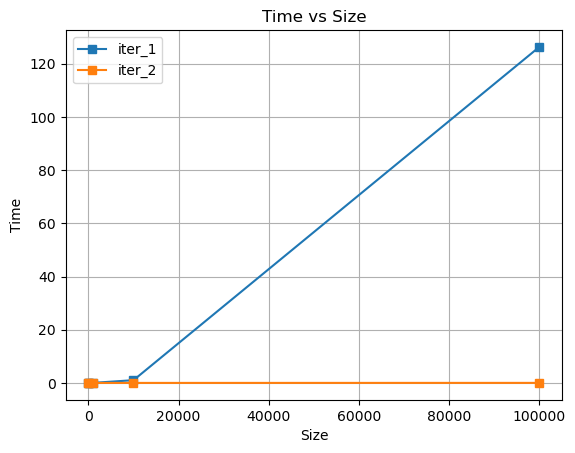

In [20]:
plt.plot(data_size,iter_1_time,'-s')
plt.plot(data_size,iter_2_time,'-s')
# plt.plot(data_size,iter_3_time,'-s')
plt.grid()
plt.legend(["iter_1",'iter_2'])
plt.xlabel('Size')
plt.ylabel('Time')
plt.title("Time vs Size")
plt.show()